# Pose Landmarks Detection with MediaPipe Tasks
This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

In [5]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Recreated pose connections since solutions.pose is gone
POSE_CONNECTIONS = frozenset([
    (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
    (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
    (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20), (11, 23),
    (12, 24), (23, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29),
    (28, 30), (29, 31), (30, 32), (27, 31), (28, 32)
])

def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        for landmark in pose_landmarks:
             # Scale landmarks to image size
             height, width, _ = annotated_image.shape
             cx, cy = int(landmark.x * width), int(landmark.y * height)
             cv2.circle(annotated_image, (cx, cy), 5, (0, 255, 0), -1)

        # Draw connections manually using OpenCV
        height, width, _ = annotated_image.shape
        for connection in POSE_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]

            start_point = pose_landmarks[start_idx]
            end_point = pose_landmarks[end_idx]

            x1, y1 = int(start_point.x * width), int(start_point.y * height)
            x2, y2 = int(end_point.x * width), int(end_point.y * height)

            cv2.line(annotated_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return annotated_image

def image_plotter(img, color):
    plt.figure(figsize=(8, 8))
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))   # zeigt RGB korrekt
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

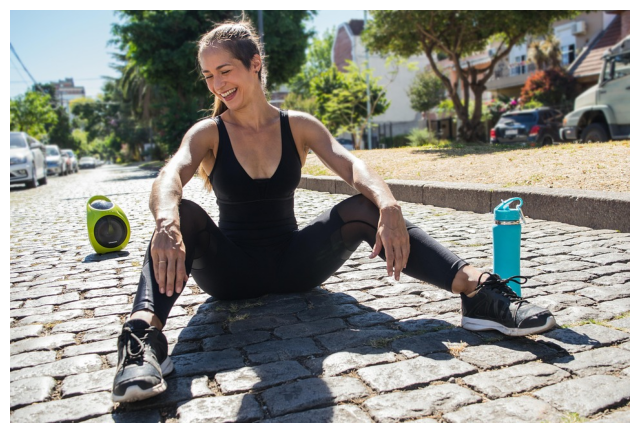

In [7]:
img = cv2.imread("image.jpg")
image_plotter(img, 1)

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.33806782960891724, y=0.18635699152946472, z=-0.134184330701828, visibility=1.0, presence=1.0, name=None), NormalizedLandmark(x=0.3448488712310791, y=0.15513479709625244, z=-0.11546294391155243, visibility=0.9999997615814209, presence=0.9999998807907104, name=None), NormalizedLandmark(x=0.35194364190101624, y=0.15197661519050598, z=-0.11572035402059555, visibility=0.9999997615814209, presence=0.9999998807907104, name=None), NormalizedLandmark(x=0.35931453108787537, y=0.14900964498519897, z=-0.11560817807912827, visibility=0.9999997615814209, presence=0.9999998807907104, name=None), NormalizedLandmark(x=0.33162742853164673, y=0.1612260639667511, z=-0.10083376616239548, visibility=0.9999998807907104, presence=0.9999998807907104, name=None), NormalizedLandmark(x=0.3291218876838684, y=0.16214501857757568, z=-0.10121411085128784, visibility=0.9999998807907104, presence=0.9999998807907104, name=None), NormalizedLandmark(x=0.32681763

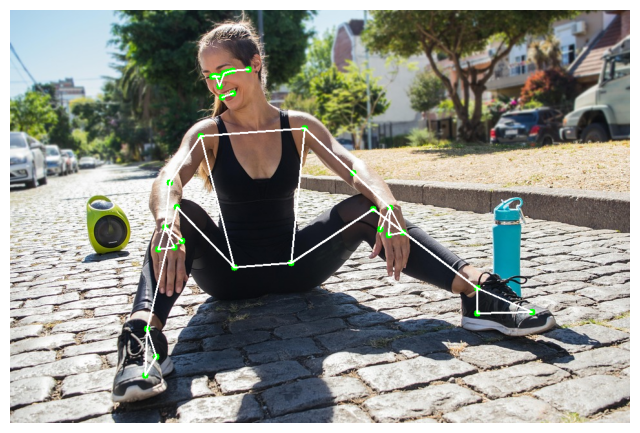

In [8]:
# STEP 1: Import the necessary modules.
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)
print(detection_result)
# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
image_plotter(annotated_image, 0)